# Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [4]:
df = pd.read_csv('SampleSuperstore.csv')

# Cleaning the Data

In [6]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [10]:
df.shape

(9994, 13)

In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Checking the null values

In [14]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [17]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Exploratory Data Analysis

In [19]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


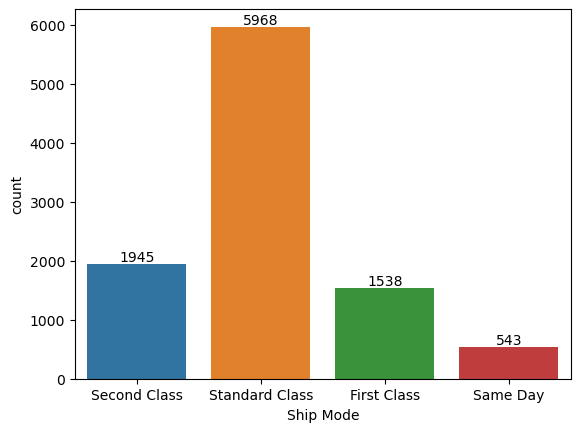

In [21]:
mode = sns.countplot(x = 'Ship Mode' ,data = df)
for bars in mode.containers:
    mode.bar_label(bars)

<Axes: xlabel='Category', ylabel='Sales'>

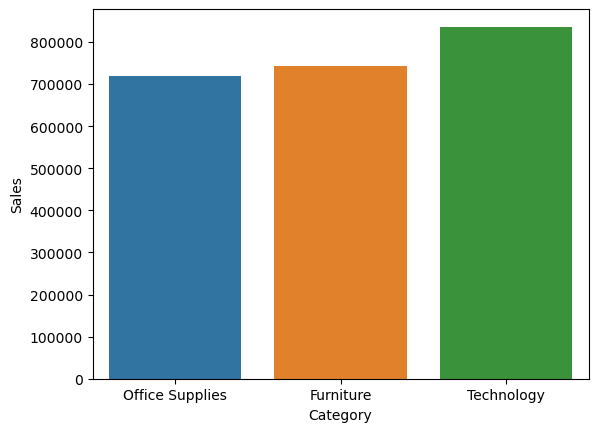

In [27]:
sales_category = df.groupby(['Category'], as_index=False)['Sales'].sum().sort_values(by='Sales')
sns.barplot(x = 'Category', y = 'Sales', data = sales_category)

From the above graph we conclude that most of the profit is drawn from purchasing technology related items.

<Axes: xlabel='Region', ylabel='Sales'>

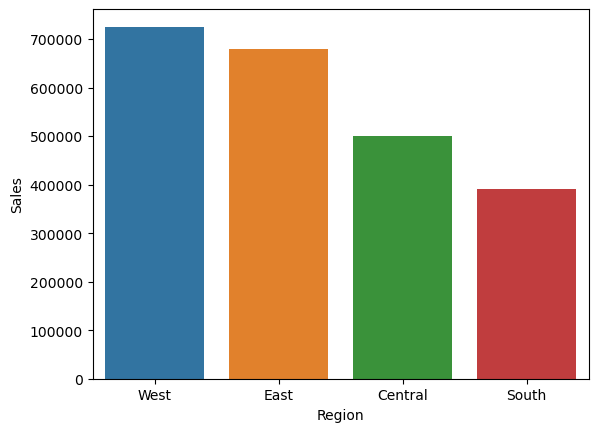

In [24]:
sales_region = df.groupby(['Region'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending = False)
sns.barplot(x = 'Region', y = 'Sales', data = sales_region)

From the above graph we conclude that, most of the items are bought from the west region of the country.

<Axes: xlabel='Segment', ylabel='Sales'>

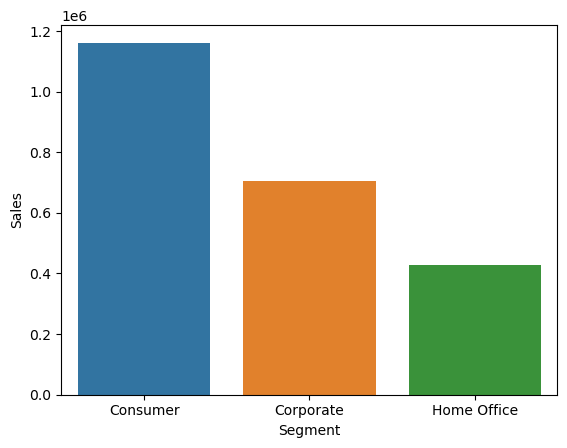

In [28]:
sales_segment = df.groupby(['Segment'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending = False)
sns.barplot(x = 'Segment', y = 'Sales', data = sales_segment)

In [29]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

<Axes: xlabel='State', ylabel='Sales'>

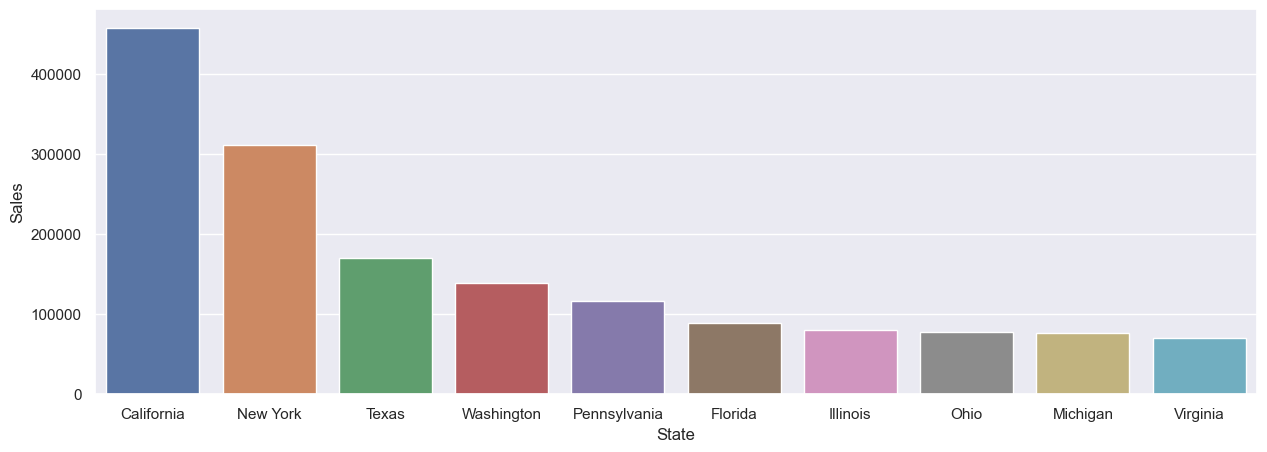

In [39]:
sales_state = df.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Sales', data = sales_state)

We analyze that , The state California has greatest purchasing power than the other states.

<Axes: xlabel='State', ylabel='Sales'>

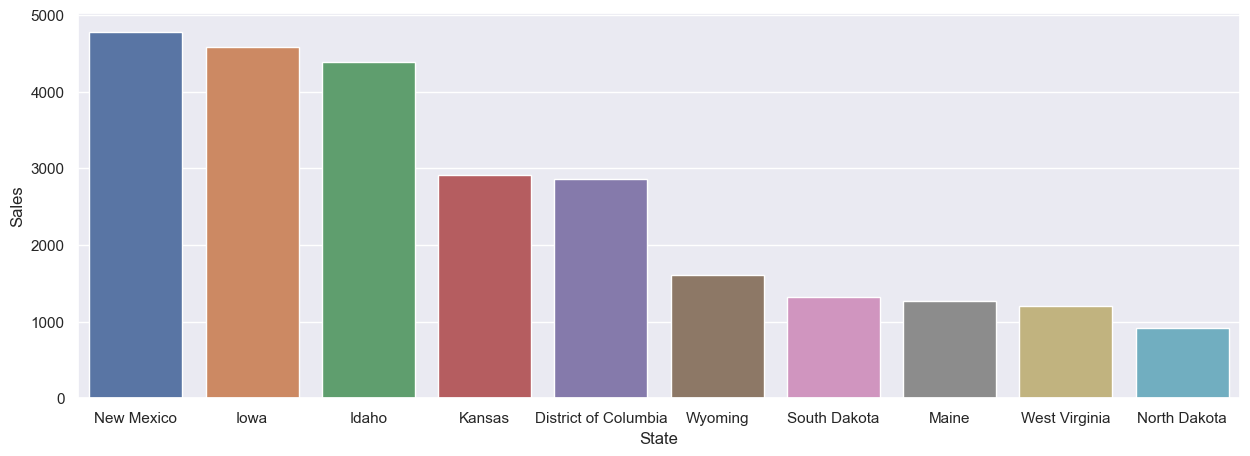

In [42]:
sales_state = df.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending = False).tail(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Sales', data = sales_state)

From the above graph we conclude that , the least profit is drawn from the state North Dakota. The business manager need to explore his sales on these above states in order to get more profit.

<Axes: xlabel='State', ylabel='Profit'>

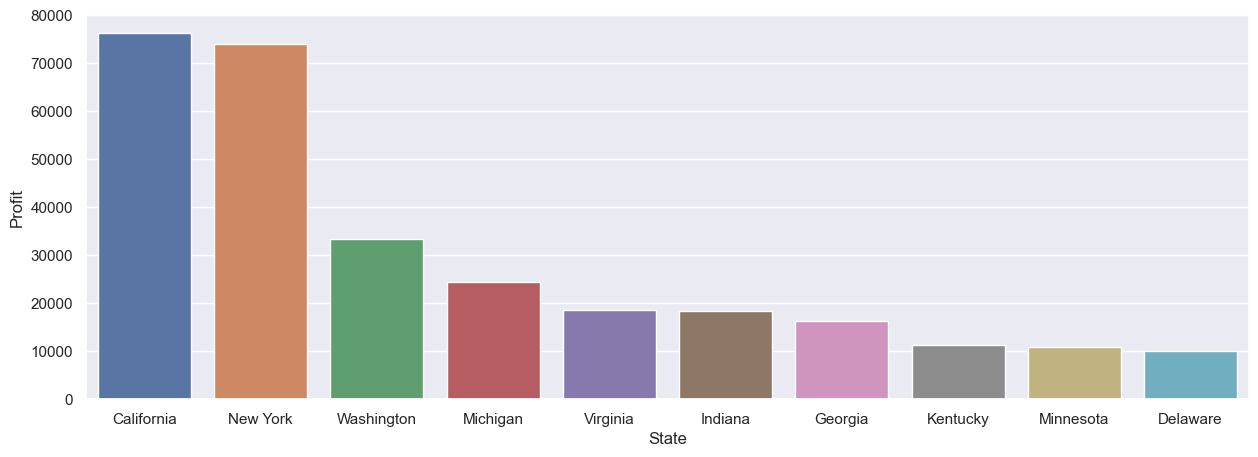

In [37]:
profit_state = df.groupby(['State'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Profit', data = profit_state)

From above, we conclude that , most of the profit of the superstore is drawn from the states california and New York.